In [2]:
import numpy as np
import plumed
from matplotlib import pyplot as plt

In [4]:
colvar=plumed.read_as_pandas("data/System_2/COLVAR")
colvar

<ipython-input-4-474f1ea29fb9>:1: UserWarning: cannot load PLUMED instance, conversions will not be available
  colvar=plumed.read_as_pandas("data/System_2/COLVAR")


,time,theta,lambda,metad.bias
0,0.00,2.965559,0.0,0.000000
1,0.02,3.116293,0.0,0.000000
2,0.04,-2.994863,8.0,0.000000
3,0.06,3.136542,3.0,0.000000
4,0.08,2.950207,4.0,0.000000
...,...,...,...,...
9999998,199999.92,-2.700293,13.0,1074.343984
9999999,199999.94,-2.794022,12.0,1084.584844
10000000,199999.96,-2.845444,10.0,1088.655973
10000001,199999.98,-2.908520,8.0,1094.065161


In [3]:
# extract torsion for lambda=0 or 19
colvar0=colvar[colvar["lambda"]==0.0]
colvar19=colvar[colvar["lambda"]==19.0]

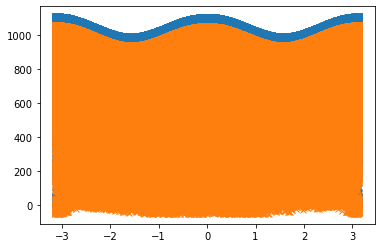

In [4]:
# this is a quick way to plot the "envelope" of the bias on theta
# it's useful on the fly, but the correct way is with sum_hills (see below)
plt.plot(colvar19["theta"],colvar19["metad.bias"],"x")
plt.plot(colvar0["theta"],colvar0["metad.bias"]-50,"x")
# the -50 is just to see both envelopes. They seem pretty similar.
# this means the F along the angle is the same at lambda=0 or lambda=1

In [5]:
# we then try sum hills on 2D
!plumed sum_hills --hills HILLS_2D --min -pi,0.0 --max pi,19.0 --bin 100,19

PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/bussi/.conda/envs/work/lib/plumed
PLUMED: For installed feature, see /Users/bussi/.conda/envs/work/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: Finished setup
PLUMED: Action F

In [6]:
fes=plumed.read_as_pandas("fes.dat")
fes

,theta,lambda,file.free,der_theta,der_lambda
0,-3.141593,0.0,-1118.335047,-0.356026,-0.0
1,-3.078761,0.0,-1117.865786,14.525031,-0.0
2,-3.015929,0.0,-1116.471656,29.402529,-0.0
3,-2.953097,0.0,-1114.146559,43.799363,-0.0
4,-2.890265,0.0,-1110.946346,57.565881,-0.0
...,...,...,...,...,...
1995,2.827433,19.0,-1109.033453,-70.923757,-0.0
1996,2.890265,19.0,-1113.070826,-58.208548,-0.0
1997,2.953097,19.0,-1116.283626,-44.680167,-0.0
1998,3.015929,19.0,-1118.599074,-30.322131,-0.0


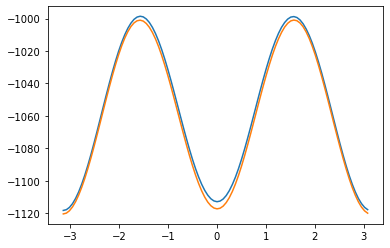

In [7]:
fes0=fes[fes["lambda"]==0.0]
fes19=fes[fes["lambda"]==19.0]
# here's the same information obtained with sum hills
plt.plot(fes0["theta"],fes0["file.free"])
plt.plot(fes19["theta"],fes19["file.free"])
# consistently, the two fes a pretty similar

In [8]:
# I can also use sum_hills to project on lambda and obtain a 1D profile integrated over torsion
# NOTE: I am assuming kBT=2.5, hopefully correct
# NOTE: integrating over lambda instead *does not make sense* since energy differences
# over lambda are arbitrary (they depend on the zero of the force field) and only makes
# sense to be used in computing DDG
!plumed sum_hills --hills HILLS_2D --min -pi,0.0 --max pi,19.0 --bin 100,19 --idw lambda --kt 2.5

PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/bussi/.conda/envs/work/lib/plumed
PLUMED: For installed feature, see /Users/bussi/.conda/envs/work/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: Finished setup
PLUMED: Action F

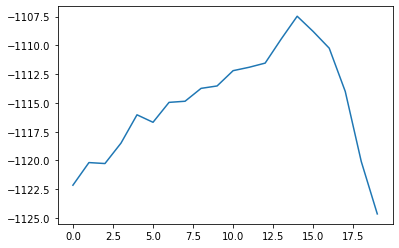

In [9]:
fes=plumed.read_as_pandas("fes.dat")
plt.plot(fes["lambda"],fes["projection"])
# I didn't expect this: the difference seems very small

(1000.0, 1166.51303895)

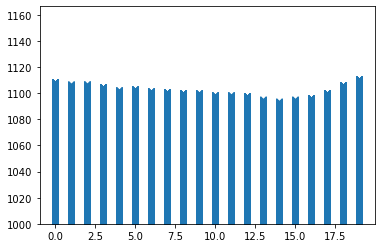

In [10]:
# weird, I was expecting something like 130... Let me check again the bias:
plt.plot(colvar["lambda"],colvar["metad.bias"],"x")
plt.ylim((1000,None))
# this is consistent

In [11]:
# it looks that the DF is small, around 1 kBT.
fes["projection"][19]-fes["projection"][0]

-2.4932908550001684

In [12]:
# let's check how it changes with time
!plumed sum_hills --hills HILLS_2D --min -pi,0.0 --max pi,19.0 --bin 100,19 --idw lambda --kt 2.5 --stride 1000

PLUMED: PLUMED is starting
PLUMED: Version: 2.7.0 (git: Unknown) compiled on Dec 23 2020 at 20:47:11
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /Users/bussi/.conda/envs/work/lib/plumed
PLUMED: For installed feature, see /Users/bussi/.conda/envs/work/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cite where appropriate!
PLUMED: Finished setup
PLUMED: Action F

PLUMED:   done with this chunk: now with 33000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_32.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 34000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_33.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 35000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_34.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 36000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_35.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 37000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on f

PLUMED:   done with this chunk: now with 72000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_71.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 73000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_72.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 74000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_73.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 75000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_74.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 76000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on f

PLUMED:   done with this chunk: now with 111000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_110.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 112000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_111.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 113000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_112.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 114000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_113.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 115000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing sub

PLUMED:   done with this chunk: now with 149000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_148.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 150000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_149.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 151000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_150.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 152000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_151.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 153000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing sub

PLUMED:   done with this chunk: now with 187000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_186.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 188000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_187.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 189000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_188.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 190000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing subgrid on file fes_189.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 191000 kernels  
PLUMED: 
PLUMED:   Bias: Projecting on subgrid... 
PLUMED:   Bias: Writing sub

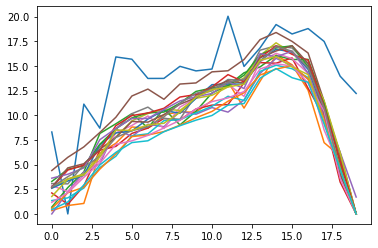

In [13]:
for i in range(0,200,10): # skip 10
    fes=plumed.read_as_pandas("fes_{}.dat".format(i+1))
    fes["projection"]-=np.min(fes["projection"])
    plt.plot(fes["lambda"],fes["projection"])
# the sum_hills result (proportional to the bias) is pretty stable after the first point

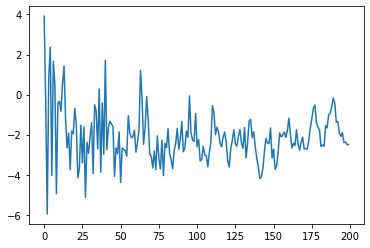

In [14]:
DF=[]
for i in range(0,200):
    fes=plumed.read_as_pandas("fes_{}.dat".format(i+1))
    DF.append(fes["projection"][19]-fes["projection"][0])

plt.plot(DF)
# looks like DF is fluctuating around -2, seems sufficient to discard the initial 10%